학번 : 202255513

이름 : 김대욱

# 자동차 연비 예측하기: 회귀

*회귀*(regression)는 가격이나 확률 같이 연속된 출력 값을 예측하는 것이 목적입니다.

이 노트북은 [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 이 기간에 출시된 자동차 정보를 모델에 제공하겠습니다. 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Auto MPG 데이터셋

이 데이터셋은 [UCI 머신 러닝 저장소](https://archive.ics.uci.edu/ml/)에서 다운로드할 수 있습니다.

### 데이터 구하기
먼저 데이터셋을 다운로드합니다.

In [4]:
!wget http://archive.ics.uci.edu/static/public/9/auto+mpg.zip
!unzip -a -o auto+mpg.zip

--2023-12-10 19:27:14--  http://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auto+mpg.zip.1’

auto+mpg.zip.1          [ <=>                ]  14.52K  93.0KB/s    in 0.2s    

2023-12-10 19:27:14 (93.0 KB/s) - ‘auto+mpg.zip.1’ saved [14873]

Archive:  auto+mpg.zip
  inflating: Index                   [binary]
  inflating: auto-mpg.data           [binary]
  inflating: auto-mpg.data-original  [binary]
  inflating: auto-mpg.names          [binary]


판다스를 사용하여 데이터를 읽습니다.

In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,
                            na_values = "?", comment='\t',
                            sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### 데이터 정제하기

이 데이터셋은 일부 데이터가 누락되어 있습니다. nan 값이 들어있는 일부 데이터를 삭제 하세요.

In [22]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### 데이터셋을 훈련 세트와 테스트 세트로 분할하기

이제 데이터를 훈련 세트(70%)와 테스트 세트(30%)로 분할합니다.

테스트 세트는 모델을 최종적으로 평가할 때 사용합니다.

In [8]:
train_dataset = dataset.sample(frac=0.7,random_state=0)

test_dataset = dataset.drop(train_dataset.index)

### 특성과 레이블 분리하기

특성에서 타깃 값 또는 "레이블"을 분리합니다. 이 레이블을 예측하기 위해 모델을 훈련시킬 것입니다.
연비 예측이므로 'MPG' 를 예측합니다.

In [9]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

#TODO: 구현 및 보고서 작성

- 데이터셋의 특성 사이의 EDA를 실시 해 보세요.
- 적절한 Attribute를 선정 하고 그 이유를 서술하세요.
- Scikit-learn을 이용해 Regression을 해보고 실제로 잘 맞추었는지 Plot을 그려보세요.
- Error를 분석 해 보세요.
- 보고서는 본 파일에 text cell을 추가하여 적절히 작성하면 됩니다. 그림이 필요한 경우는 cell을 추가하여 그림이 출력된 상태나 text cell에 그림을 붙여넣기하여 작성해도 됩니다.

1. 자동차 연비와 관련 있는 Attribute는 ['Cylinders', 'Displacement', 'Weight', 'Acceleration'] 이므로, 해당 속성을 이용하여 분석했다.

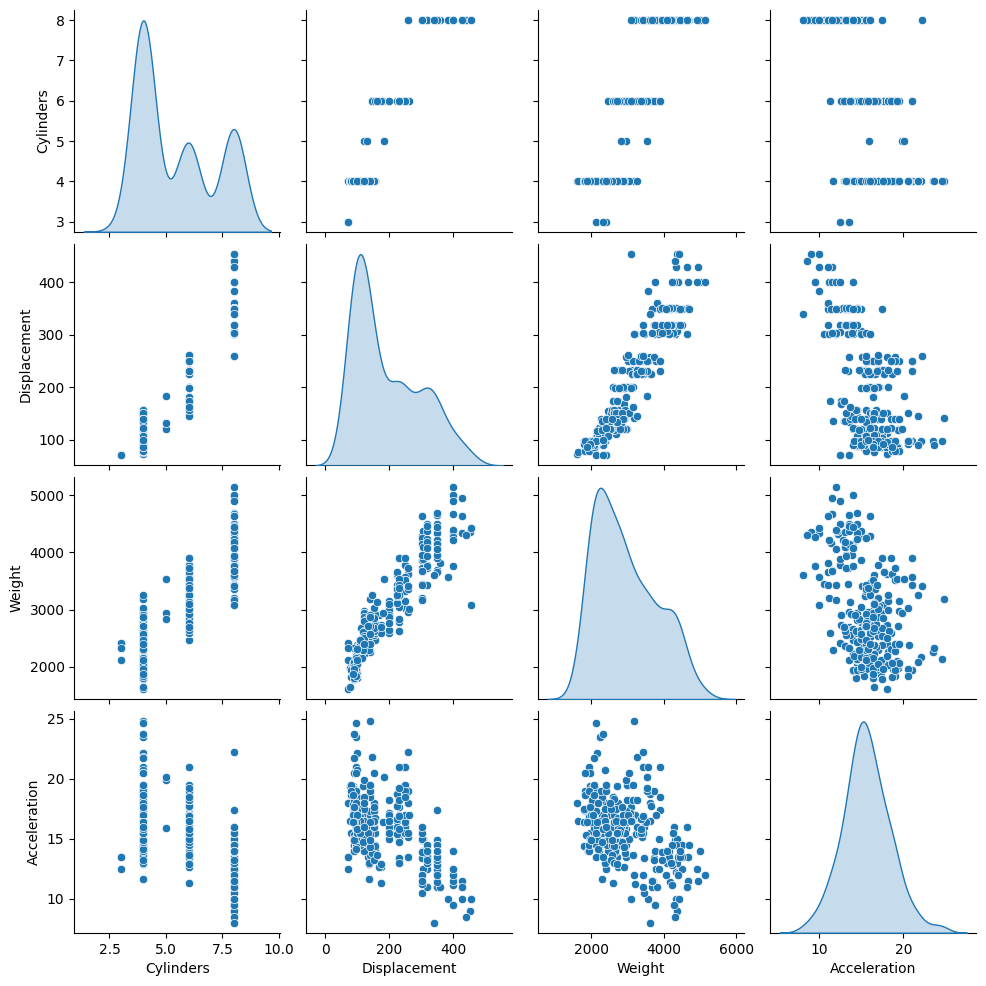

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
selected_features = ['Cylinders', 'Displacement', 'Weight', 'Acceleration']
sns.pairplot(train_dataset[selected_features], diag_kind='kde')
plt.show()

2. scikit-learn을 활용하여 선형회귀 모델을 학습하고, 예측결과를 시각화 하였으며 에러를 분석해 보았다. 시각화 해본 결과, 준수한 결과를 보여주었으며, MSE가 15.5 정도 나왔다.

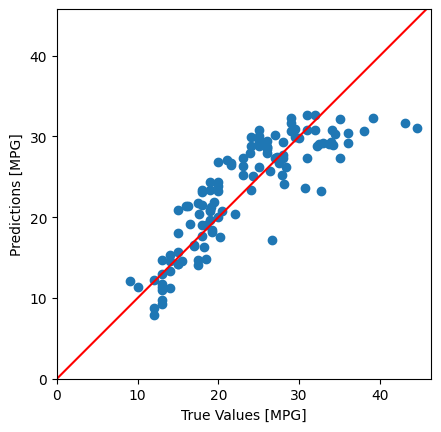

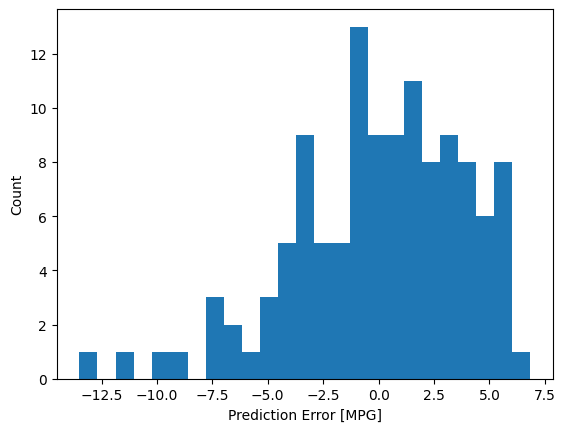

Mean Squared Error: 15.50813798796471


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 모델 학습
model = LinearRegression()
model.fit(train_dataset, train_labels)

# 예측
predictions = model.predict(test_dataset)

# 예측 결과 시각화
plt.scatter(test_labels, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], color='red')
plt.show()

# 에러 분석
error = predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")
plt.show()

# 평균 제곱 오차(Mean Squared Error) 계산
mse = mean_squared_error(test_labels, predictions)
print(f'Mean Squared Error: {mse}')